$$Diego \space Castillo \space Reyes$$
<h1 align="center">Codificación en base</h1>
Input: Palabra

Output: Codificación en base

In [6]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [7]:
word = input("Ingrese una palabra: ")

# save in a dictionary the letters and their corresponding ascii representation
letters = {}
for i, letter in enumerate(word):
    letters[letter] = ord(letter)

print(f"Formato ascii: {letters}")

lettersB = {}
for i, letter in enumerate(word):
    lettersB[letter] = format(ord(letter), '0b')
print(f"Formato binario: {lettersB}")

qubits = len(word) * len(bin(max(letters.values()))[2:])  # number of qubits needed
print(f"Numero de qubits necesarios para la codificacion: {qubits}")

Formato ascii: {'h': 104, 'o': 111, 'l': 108, 'a': 97}
Formato binario: {'h': '1101000', 'o': '1101111', 'l': '1101100', 'a': '1100001'}
Numero de qubits necesarios para la codificacion: 28


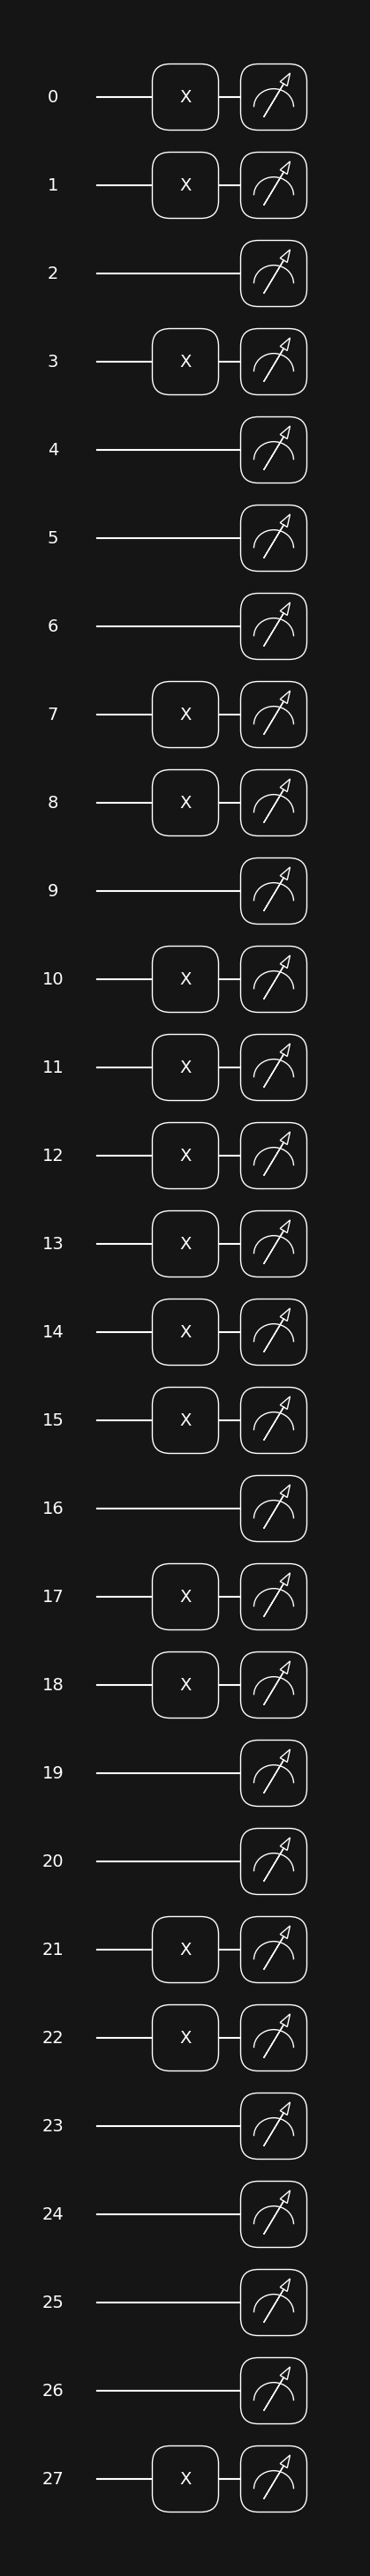

In [ ]:
# define the device
dev = qml.device("default.qubit", wires=qubits, shots=1024)

# define the circuit
@qml.qnode(dev)
def circuit(word):
    for i, letter in enumerate(word):
        ascii_value = ord(letter)
        binary_value = format(ascii_value, '09b')  # 9 bits for ASCII representation
        j = i * 7
        for k, bit in enumerate(binary_value):
            if k >= 2: # Skip the '0b' prefix
                if bit == '1':
                    qml.PauliX(wires=j)
                j += 1
    return qml.probs(wires=range(qubits))

# draw the circuit
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)(word)
plt.show()